In [1]:
import os, glob
import numpy as np
import xarray as xr
from enum import Enum
import pandas as pd
import matplotlib.pyplot as plt 
from glob import glob
import sys
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
sys.path.append('modules')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import constants
sys.path.append(constants.MODULE_DIR)
import open_ds
import xarray_class_accessors as xca
from importlib import reload
import sn_plotting
import matplotlib.gridspec as gridspec
import utils
from warnings import filterwarnings
filterwarnings('ignore')
import open_ds
import classes
import signal_to_noise
from pprint import pprint
from classes import LocationsLatLon, ExperimentTypes
import sn_plotting
import xarray_extender

In [2]:
notebook_number = '06'

In [3]:
constants.WINDOWS_OF_INTEREST

[20, 80, 150]

In [4]:
experiment_to_run = [constants.EXPERIMENTS_TO_RUN[0]]
experiment_to_run

[{'variable': 'tas', 'mask': None, 'hemisphere': 'global'}]

In [5]:
variable = experiment_to_run[0]['variable']
ROOT_DIR = os.path.join(constants.LONGRUNMIP_DIR, variable)
ROOT_DIR_REGRID = os.path.join(ROOT_DIR, 'regrid_retimestamped')
ROOT_DIR_SN = os.path.join(ROOT_DIR, 'signal_to_noise')
print(ROOT_DIR, ROOT_DIR_REGRID, ROOT_DIR_SN, sep='\n')

/g/data/w40/ab2313/PhD/longrunmip/tas
/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped
/g/data/w40/ab2313/PhD/longrunmip/tas/signal_to_noise


In [6]:
models_to_get = open_ds.get_models_longer_than_length() # constants.LONGRUNMIP_MODELS
utils.pprint_list(models_to_get, num_start_items=len(models_to_get))

lenght = 7
 0. ccsm3
 1. cesm104
 2. cnrmcm61
 3. hadcm3l
 4. ipslcm5a
 5. mpiesm11
 6. mpiesm12


In [7]:
max_length = constants.LONGRUNMIP_LENGTH
max_effective_length = constants.LONGRUNMIP_EFFECTIVE_LENGTH
print(f'{max_length=} - {max_effective_length=}')

max_length=800 - max_effective_length=650


In [8]:
ROOT_DIR

'/g/data/w40/ab2313/PhD/longrunmip/tas'

In [9]:
files_to_open_experiment = open_ds.get_file_names_from_from_directory(
    os.path.join(ROOT_DIR, 'regrid_retimestamped'),ExperimentTypes.ABRUPT4X, models_to_get)

files_to_open_control = open_ds.get_file_names_from_from_directory(
    os.path.join(ROOT_DIR, 'regrid_retimestamped'), ExperimentTypes.CONTROL, models_to_get)

utils.pprint_list(files_to_open_experiment, num_start_items=5)

lenght = 7
 0. tas_mon_CCSM3_abrupt4x_2120_g025.nc
 1. tas_mon_CESM104_abrupt4x_5900_g025.nc
 2. tas_mon_CNRMCM61_abrupt4x_1850_g025.nc
 3. tas_mon_HadCM3L_abrupt4x_1000_g025.nc
 4. tas_mon_IPSLCM5A_abrupt4x_1000_g025.nc


In [10]:
control_ds = open_ds.read_and_merge_netcdfs(files_to_open_control, 
                                            os.path.join(ROOT_DIR, 'regrid_retimestamped'),
                                            mask=experiment_to_run[0]['mask'])

abrupt4x_ds = open_ds.read_and_merge_netcdfs(files_to_open_experiment, 
                                             os.path.join(ROOT_DIR, 'regrid_retimestamped'),
                                             mask=experiment_to_run[0]['mask'])
abrupt4x_ds

- Removing first 10 steps


<xarray.Dataset>
Dimensions:   (time: 1200, lon: 144, lat: 72)
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 1200-12-31 00:00:00
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height    float64 ...
Data variables:
    ccsm3     (time, lat, lon) float32 -36.44 -36.81 -36.81 ... -2.414 -2.413
    cesm104   (time, lat, lon) float32 -42.74 -42.83 -42.9 ... -4.047 -4.015
    cnrmcm61  (time, lat, lon) float32 -47.32 -47.32 -47.33 ... 4.162 4.18 4.18
    hadcm3l   (time, lat, lon) float64 -43.95 -44.02 -43.9 ... nan nan nan
    ipslcm5a  (time, lat, lon) float32 -42.89 -43.01 -43.13 ... nan nan nan
    mpiesm11  (time, lat, lon) float32 -47.93 -47.92 -47.89 ... 1.017 1.015
    mpiesm12  (time, lat, lon) float32 -48.58 -48.6 -48.65 ... nan nan nan
Attributes:
    length:   2120

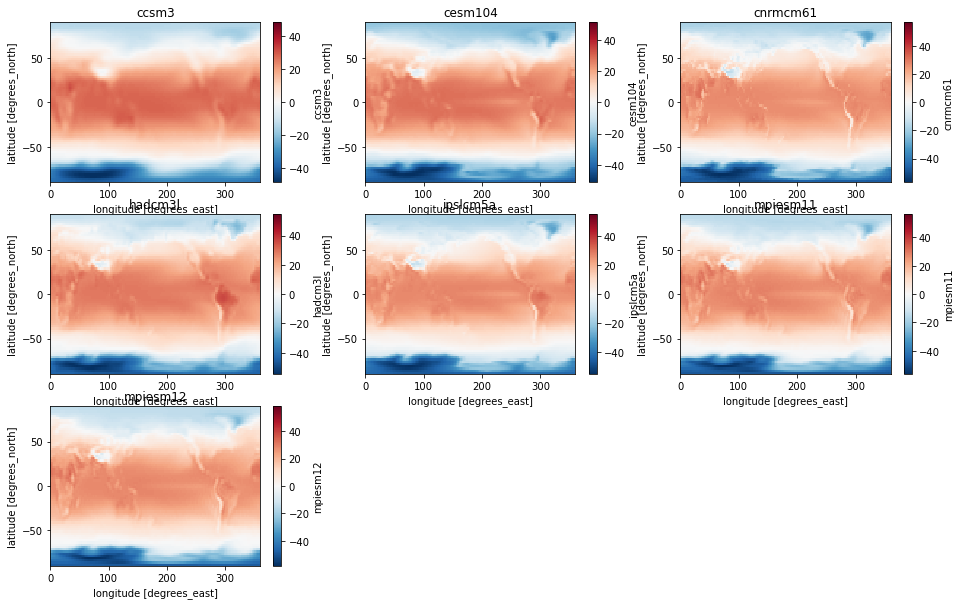

In [11]:
models = list(abrupt4x_ds.data_vars)
num_cols = 3
num_rows = int(np.ceil(len(models)/num_cols))

fig = plt.figure(figsize=(16,10))

for i,model in enumerate(models):
    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    abrupt4x_ds[model].isel(time=0).plot(ax=ax)
    ax.set_title(model)
    
    ax.set_title(model)

In [12]:
experiment_global_ds, control_global_ds = open_ds.get_all_experiment_ds(
    experiments_to_run=experiment_to_run, directory=constants.LONGRUNMIP_DIR, 
    models_to_get=models_to_get, max_length=max_length)
experiment_global_ds


- {'variable': 'tas', 'mask': None, 'hemisphere': 'global'}
- Removing first 10 steps
ccsm3, cesm104, cnrmcm61, hadcm3l, ipslcm5a, mpiesm11, mpiesm12, 

<xarray.Dataset>
Dimensions:     (time: 800, model: 7)
Coordinates:
  * time        (time) object 0001-12-31 00:00:00 ... 0800-12-31 00:00:00
  * model       (model) <U8 'ccsm3' 'cesm104' ... 'mpiesm11' 'mpiesm12'
Data variables:
    tas_global  (model, time) float64 2.283 2.568 2.735 ... 6.008 6.043 6.099

In [13]:
# Signal to Noise for global mean.
sn_global_ds = signal_to_noise.calculate_multi_window_rolling_signal_to_nosie_and_bounds(
    experiment_global_ds.to_array().dropna(dim='time').squeeze(),
    control_global_ds.dropna(dim='time').to_array().squeeze(), 
    windows=constants.WINDOWS_OF_INTEREST)


sn_global_sn_unstable = sn_global_ds.utils.above_or_below('signal_to_noise', 
                                            greater_than_var='upper_bound', less_than_var='lower_bound')


first_year_stable_global_ds = signal_to_noise.get_dataset_stable_year_multi_window(
    sn_global_sn_unstable, max_effective_length)
first_year_stable_global_ds


Experiment
--------

[20, 80, 150]
20, 80, 150, 
Control
------

[20, 80, 150]
20, 80, 150, Replacing points greater than 650 with 651


<xarray.Dataset>
Dimensions:   (model: 7, variable: 1, window: 3)
Coordinates:
  * model     (model) <U8 'ccsm3' 'cesm104' 'cnrmcm61' ... 'mpiesm11' 'mpiesm12'
  * variable  (variable) <U15 'signal_to_noise'
  * window    (window) int64 20 80 150
Data variables:
    time      (variable, window, model) int64 32 47 77 25 78 ... 651 651 651 651

In [14]:
# TODO: Please put this in function and move to open_ds

# Signal to Noise for each grid cell
to_concat = []
for window in constants.WINDOWS_OF_INTEREST:
    print(f'{window=}')
    WINDOW_DIR = os.path.join(ROOT_DIR_SN, f'window_{window}')
    files_to_open_signal_to_noise = open_ds.get_file_names_from_from_directory(
        WINDOW_DIR, classes.ExperimentTypes.SIGNAL_TO_NOISE, models_to_get)   
    sn_ds = open_ds.open_signal_to_noise_dataset(files_to_open_signal_to_noise, WINDOW_DIR)
    
    to_concat.append(sn_ds)

sn_local_ds = xr.concat(to_concat, dim='window').isel(time=slice(None, max_length))

sn_local_ds

window=20
window=80
window=150


<xarray.Dataset>
Dimensions:          (time: 800, lon: 144, lat: 72, model: 7, window: 3)
Coordinates:
  * time             (time) object 0001-12-31 00:00:00 ... 0800-12-31 00:00:00
    height           float64 2.0
  * lon              (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lat              (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * model            (model) object 'ccsm3' 'cesm104' ... 'mpiesm11' 'mpiesm12'
  * window           (window) int64 20 80 150
Data variables:
    signal_to_noise  (window, model, time, lat, lon) float64 nan nan ... 0.7317
    lower_bound      (window, model, lat, lon) float64 -1.808 -1.783 ... -1.181
    upper_bound      (window, model, lat, lon) float64 1.993 1.994 ... 1.346

In [15]:
# Getting the stable and unstable values - signal-to-noise has been calculated above. 

sn_global_stable_ds = sn_global_ds.utils.between(
    'signal_to_noise', greater_than_var='lower_bound', less_than_var='upper_bound')

sn_local_ds_stable = sn_local_ds.utils.between('signal_to_noise', 
                                            greater_than_var='lower_bound', less_than_var='upper_bound')

experiment_global_stable_ds = experiment_global_ds.where(np.isfinite(sn_global_stable_ds.signal_to_noise))

sn_local_ds_unstable = sn_local_ds.utils.above_or_below('signal_to_noise', 
                                            greater_than_var='upper_bound', less_than_var='lower_bound')
sn_local_ds_unstable

<xarray.Dataset>
Dimensions:          (time: 800, lon: 144, lat: 72, model: 7, window: 3)
Coordinates:
  * time             (time) object 0001-12-31 00:00:00 ... 0800-12-31 00:00:00
    height           float64 2.0
  * lon              (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lat              (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * model            (model) object 'ccsm3' 'cesm104' ... 'mpiesm11' 'mpiesm12'
  * window           (window) int64 20 80 150
Data variables:
    signal_to_noise  (window, model, time, lat, lon) float64 nan nan ... nan nan

In [16]:
open_ds.apply_landsea_mask

<function open_ds.apply_landsea_mask(ds: xarray.core.dataset.Dataset, model: str, mask: Union[ForwardRef('land'), ForwardRef('sea')] = None)>

In [17]:
first_year_stable_local_ds = signal_to_noise.get_dataset_stable_year_multi_window(
    sn_local_ds_unstable, max_effective_length)
first_year_stable_local_ds

Replacing points greater than 650 with 651


<xarray.Dataset>
Dimensions:   (lon: 144, lat: 72, model: 7, window: 3, variable: 1)
Coordinates:
    height    float64 2.0
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * model     (model) object 'ccsm3' 'cesm104' ... 'mpiesm11' 'mpiesm12'
  * window    (window) int64 20 80 150
  * variable  (variable) <U15 'signal_to_noise'
Data variables:
    time      (variable, window, model, lat, lon) int64 12 12 12 ... 361 361 361

In [18]:
if experiment_to_run[0]['mask']:
    # Any model is fine as they are all on the same grid
    first_year_stable_local_ds = open_ds.apply_landsea_mask(
        first_year_stable_local_ds, 'ipslcm5a', experiment_to_run[0]['mask'])

In [19]:
# Median year at which they become stable
median_local_stable = xarray_extender.get_median_and_uncertainty_across_dim(first_year_stable_local_ds,
                                                                            dim='model')
# Difference between local and global
first_stable_diff_global = first_year_stable_local_ds - first_year_stable_global_ds

# Median Difference between local and global
median_local_diff = xarray_extender.get_median_and_uncertainty_across_dim(first_stable_diff_global, dim='model')

In [20]:
def get_finite_points_with_dataset_from_dataarray(ds, da):
    to_merge = []
    for model in list(ds.data_vars):
        stable_window_da = ds[model].where(
            np.isfinite(da.sel(model=model))).drop('model', errors='ignore')

        to_merge.append(stable_window_da)
    return xr.merge(to_merge, compat='override')

In [21]:
to_concat = []
for window in sn_local_ds_stable.window.values:
    abrupt4x_stable_single_window_ds = get_finite_points_with_dataset_from_dataarray(
                            abrupt4x_ds, sn_local_ds_stable.sel(window=window).signal_to_noise)
    to_concat.append(abrupt4x_stable_single_window_ds)
abrupt4x_stable_ds = xr.concat(to_concat, dim='window')

In [22]:
abrupt4x_stable_ds

<xarray.Dataset>
Dimensions:   (time: 800, lon: 144, lat: 72, window: 3)
Coordinates:
  * time      (time) object 0001-12-31 00:00:00 ... 0800-12-31 00:00:00
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height    float64 2.0
  * window    (window) int64 20 80 150
Data variables:
    ccsm3     (window, time, lat, lon) float32 nan nan nan ... -5.563 -5.563
    cesm104   (window, time, lat, lon) float32 nan nan nan nan ... nan nan nan
    cnrmcm61  (window, time, lat, lon) float32 nan nan nan ... 3.506 3.523 3.523
    hadcm3l   (window, time, lat, lon) float64 nan nan nan ... -4.078 -4.062
    ipslcm5a  (window, time, lat, lon) float32 nan nan nan ... -3.632 -3.629
    mpiesm11  (window, time, lat, lon) float32 nan nan nan ... 0.6123 0.6127
    mpiesm12  (window, time, lat, lon) float32 nan nan nan ... 1.205 1.202 1.201

# Scattter Grad Vs First Year Stable

In [142]:
WINDOW = 80

## Global mean

In [143]:
gradient_global_ds = experiment_global_ds.tas_global.sn.calculate_rolling_signal(window=WINDOW)/WINDOW
gradient_global_ds = gradient_global_ds.isel(time=1)
gradient_global_ds

<xarray.DataArray 'signal' (window: 1, model: 7)>
array([[0.01423976, 0.01962436, 0.03822185, 0.01676749, 0.03487877,
        0.02136797, 0.0222628 ]])
Coordinates:
    time     object 0002-12-31 00:00:00
  * model    (model) <U8 'ccsm3' 'cesm104' 'cnrmcm61' ... 'mpiesm11' 'mpiesm12'
  * window   (window) int64 80

In [144]:
grad_year_dict = {}
for model in first_year_stable_global_ds.model.values:
    grad_year_dict[model] = (first_year_stable_global_ds.sel(model=model, window=20).time.values[0],
                            gradient_global_ds.sel(model=model).values[0])

In [145]:
grad_year_list = list(map(list,zip(*list(grad_year_dict.values()))))
grad_year_list

[[32, 47, 77, 25, 78, 29, 43],
 [0.01423976033213438,
  0.019624364218184285,
  0.03822185245132537,
  0.016767494144261864,
  0.034878770211354375,
  0.021367973275744634,
  0.022262795391744472]]

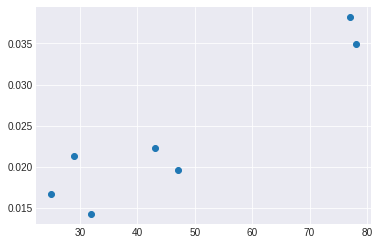

In [146]:
plt.scatter(*grad_year_list)

## Local

In [150]:
%%time
short_da = abrupt4x_ds.isel(time=slice(None, int(1.5 * WINDOW))).to_array(dim='model')
short_grad_da = short_da.sn.calculate_rolling_signal(window=WINDOW)/WINDOW

CPU times: user 29min 48s, sys: 10.5 s, total: 29min 59s
Wall time: 30min 17s


In [151]:
short_grad_da

<xarray.DataArray 'signal' (window: 1, model: 7, time: 42, lat: 72, lon: 144)>
array([[[[[        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          ...,
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan],
          [        nan,         nan,         nan, ...,         nan,
                   nan,         nan]],

         [[ 0.02724002,  0.02712066,  0.02711998, ...,  0.02748158,
            0.02736319,  0.0273626 ],
          [ 0.02722217,  0.02709598,  0.02699058, ...,  0.02765589,
            0.02749878,  0.02735632],
          [ 0.02714499,  0.02688951,  0.02667037, ...,  0.02803316,
            0.02770453,  0.02741646],
...
          [ 0.00609512,  0.00409517,  0.00124833, ...,  0.00798979,
            0.00767463,  0.00720582],
          [ 0.00315455,  0.00222889,  0.00114954, ...,  0.00513972,
            0.00465397,  0.00396941],
          [ 0.00440539,  0.00436862,  0.00430083, ...,  0.00447371,
            0.00445069,  0.00443407]],

         [[ 0.01801806,  0.01791881,  0.01776886, ...,  0.018193  ,
            0.01811664,  0.01807039],
          [ 0.02033473,  0.02008464,  0.02028106, ...,  0.01972043,
            0.02004493,  0.02000747],
          [ 0.01864783,  0.01879159,  0.01911267, ...,  0.01792797,
            0.01834397,  0.01854877],
          ...,
          [ 0.0044052 ,  0.00226595, -0.00065329, ...,  0.00639481,
            0.00614326,  0.0056506 ],
          [ 0.0012005 ,  0.0002629 , -0.0008143 , ...,  0.0032292 ,
            0.00272948,  0.0020287 ],
          [ 0.00341709,  0.0033822 ,  0.00332024, ...,  0.00348532,
            0.00346165,  0.00344401]]]]])
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 0042-12-31 00:00:00
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height   float64 2.0
  * model    (model) <U8 'ccsm3' 'cesm104' 'cnrmcm61' ... 'mpiesm11' 'mpiesm12'
  * window   (window) int64 80

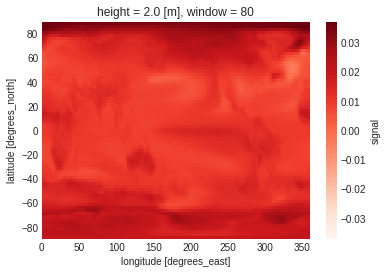

In [152]:
short_grad_da.mean(dim=['model', 'time']).plot(cmap='Reds')

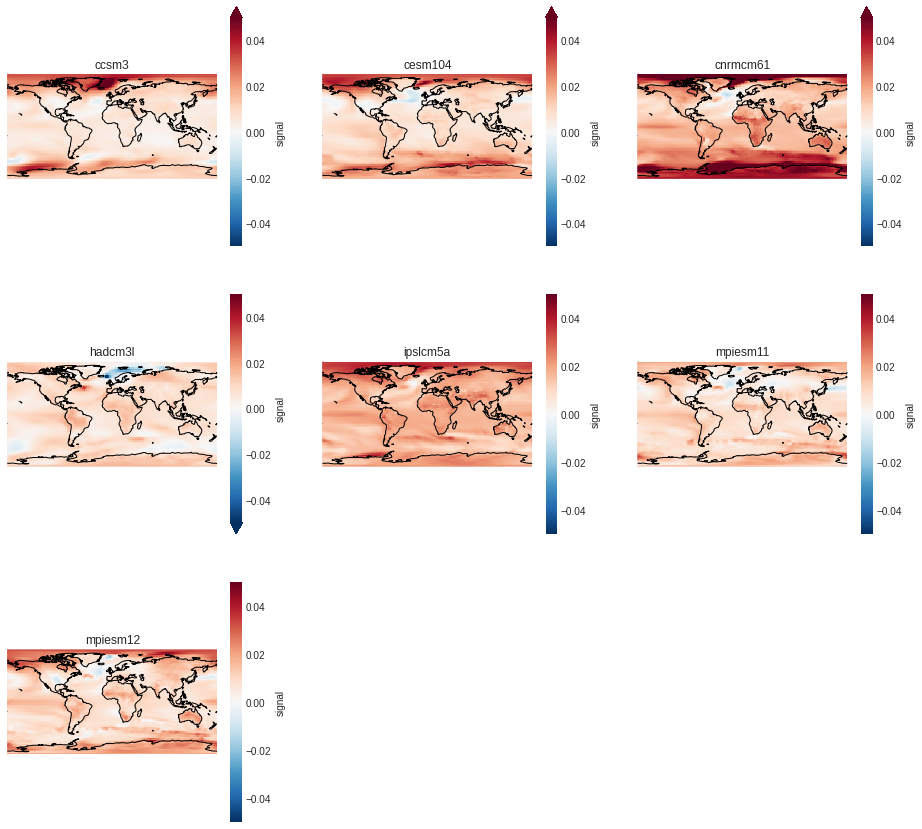

In [153]:
models = list(short_grad_da.model.values)
num_cols = 3
num_rows = int(np.ceil(len(models)/num_cols))

fig = plt.figure(figsize=(16,15))

for i,model in enumerate(models):
    ax = fig.add_subplot(num_rows, num_cols, i+1, projection=ccrs.PlateCarree())
    
    short_grad_da.sel(model=model).isel(time=slice(None, 50)).mean(dim='time').plot(
        ax=ax, vmin=-0.05, vmax=0.05, cmap='RdBu_r')
    ax.set_title(model)
    ax.coastlines()
    
    ax.set_title(model)

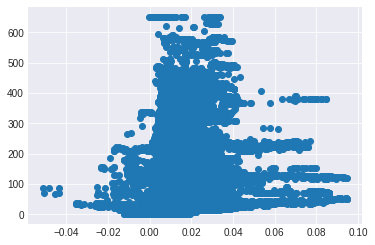

In [155]:
plt.scatter(short_grad_da.mean(dim='time').squeeze().values,
           first_year_stable_local_ds.sel(window=WINDOW).squeeze().time.values)

In [157]:
short_grad_da.model.values

array(['ccsm3', 'cesm104', 'cnrmcm61', 'hadcm3l', 'ipslcm5a', 'mpiesm11',
       'mpiesm12'], dtype='<U8')

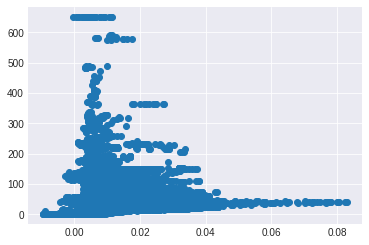

In [168]:
plt.scatter(short_grad_da.mean(dim='time').sel(model='ccsm3').squeeze().values,
           first_year_stable_local_ds.sel(window=WINDOW).sel(model='ccsm3').squeeze().time.values)

# Plots

## Global Mean 

In [23]:
window = constants.WINDOWS_OF_INTEREST[2]
model='ipslcm5a'

In [24]:
var_full = list(experiment_global_ds.data_vars)[0]
var_full

'tas_global'

In [25]:
stable_arg = int(first_year_stable_global_ds.sel(model=model, window=window).time.values)
stable_point = [sn_global_ds.time.values[stable_arg], 
                float(experiment_global_ds[var_full].sel(model=model).isel(time=stable_arg).values)]

bounds = {'lower':float(sn_global_ds['lower_bound'].sel(window=window, model=model).values), 
          'upper':float(sn_global_ds['upper_bound'].sel(window=window, model=model).values)}
print(stable_point, bounds, sep='\n')

[cftime.DatetimeGregorian(652, 12, 31, 0, 0, 0, 0, has_year_zero=False), 7.047291278839111]
{'lower': -1.2617559718011733, 'upper': 1.2006788055355533}


/home/563/ab2313/gdata/images/PhD/top_level/06_tas_global_ipslcm5a_150_global_sn_temp_anomly_with_boundsand_stable_year.png


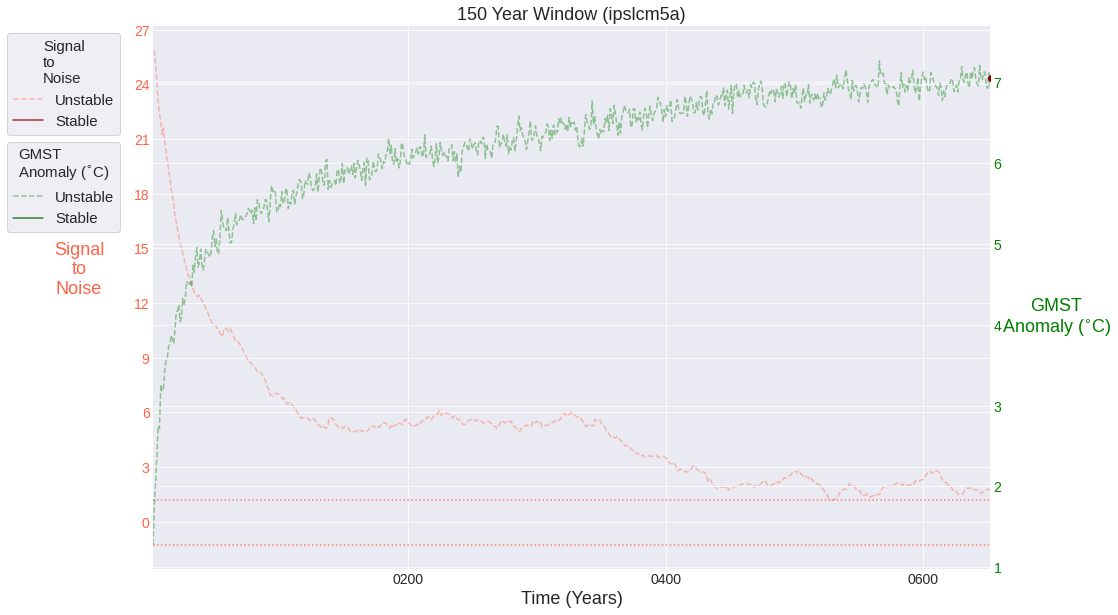

In [26]:
reload(sn_plotting)
fig, ax1, ax2 = sn_plotting.two_line_highlight_plot(
    left_ds=sn_global_ds['signal_to_noise'].sel(window=window, model=model).squeeze(), 
    right_ds=experiment_global_ds[var_full].sel(model=model), 
    left_highlight_ds = sn_global_stable_ds['signal_to_noise'].sel(window=window, model=model),
    right_highlight_ds = experiment_global_stable_ds[var_full].sel(window=window, model=model), 
    bounds=bounds,
    left_label='Signal\nto\nNoise', right_label='GMST\nAnomaly'+ r' ($^{\circ}$C)',)

ax2.plot(*stable_point, marker='o', markersize=6, markerfacecolor='darkred', markeredgecolor='darkred')
ax1.set_xlim(experiment_global_ds.time.values[0], 
             experiment_global_ds.time.values[constants.LONGRUNMIP_EFFECTIVE_LENGTH])
ax1.set_title(f'{window} Year Window ({model})', fontsize=18);
                #Abrupt 4xCO2 GMST Anomalies and Signal to Noise 

save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
        f'{notebook_number}_{var_full}_{model}_{window}_global_sn_temp_anomly_with_boundsand_stable_year.png')

print(save_name)
fig.savefig(save_name, dpi=500)

## Single Grid Cell

In [27]:
import classes

In [28]:
def get_stable_point_dict(stable_year_ds, values_ds, lat, lon, window):
    stable_points = {}

    lat,lon = location.value

    for model in stable_year_ds.model.values:

        stable_arg = int(stable_year_ds.sel(lat=lat, lon=lon, method='nearest')
                         .sel(model=model, window=window).time.values)
        stable_point = [values_ds.time.values[stable_arg], 
        float(values_ds[model].sel(lat=lat, lon=lon, method='nearest').isel(time=stable_arg).values)]
        
        stable_points[model] = stable_point
    return stable_points

In [29]:
def get_location_title(location: LocationsLatLon) -> str:
    lat,lon = location.value

    str_lat = str(abs(round(lat, 1)))
    str_lon = str(abs(round(lon, 1)))
    str_lat = str_lon + 'N' if lat > 0 else str_lon + 'S'
    str_lon = str_lon +'E' if lon > 0 else str_lon + 'W'
    location_name = location.name.replace('_', ' ').title()
    location_title = f'{location_name}'  + r' ({}, {})'.format(str_lat, str_lon)
    return location_title

In [30]:
def plot_single_point_all_models(ds, location: LocationsLatLon, length =500, start=0,
                                 fig=None, ax=None, legend_on: bool=True, bbox_to_anchor = [-0.03, 1],
                                ylabel=None, xlabel=None, ylim=None, linestyle=':'):
    lat,lon = location.value
    plt.style.use('seaborn-darkgrid')

    models = [model for model in list(constants.MODEL_PARAMS) if model in ds.data_vars]

    if fig is None:
        fig  = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
    for model in models:
        da = (ds[model]
              .isel(time=slice(start, length))
              .sel(lat=lat, lon=lon, method='nearest')
             )
        color = constants.MODEL_PARAMS[model.lower()]['color']
        da.plot(ax=ax, label=model, linestyle=linestyle, color=color)
    if legend_on:
        leg = ax.legend()
        ax.legend(ncol=1, fontsize=15, bbox_to_anchor=bbox_to_anchor, frameon=True)
#         leg.set_title(label)
        leg.get_title().set_fontsize('15')
    ax.set_xlim(ds.time.values[start], ds.time.values[length])
    
    ax.set_title(get_location_title(LocationsLatLon.LONDON))
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
#     ax.set
    
    if ylabel:
        ax.set_ylabel(ylabel,fontsize = 16, rotation = 0, labelpad = 55)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16)
    if ylim:
        ax.set_ylim(ylim)
        
    return fig, ax

In [31]:
def local_point_plot(values_ds, stable_values_ds, window, location, stable_points, fig=None, ax=None,
                    legend_on=True, ylabel=None, xlabel=None, ylim=None):

    fig, ax = plot_single_point_all_models(
        stable_values_ds.sel(window=window), location, fig=fig, ax=ax, linestyle='solid',
        legend_on=legend_on)

    plot_single_point_all_models(values_ds, location, fig=fig, ax=ax, legend_on=False,
      ylabel=f'{ylabel_name}\n{constants.VARIABLE_INFO[variable]["units"]}',
                                xlabel='Time (years)')

    for model, point in stable_points[window].items():
        color = color = constants.MODEL_PARAMS[model.lower()]['color']
        ax.scatter(point[0], point[1], zorder=100, color=color, edgecolor='k', s=25)
        
    if ylabel:
        ax.set_ylabel(ylabel,fontsize = 16, rotation = 0, labelpad = 55)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16)
    if ylim:
        ax.set_ylim(ylim)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
        
    return fig, ax

In [32]:
dir(LocationsLatLon)

['ARCTIC',
 'BEIJING',
 'BUENOS_AIRES',
 'CENTRAL_PACIFIC',
 'ECHINA_SEA',
 'EPACIFIC',
 'JAKARTA',
 'KINSHASA',
 'LONDON',
 'MELBOURNE',
 'NATLANTIC',
 'NEW_YORK',
 'SOUTHERN_OCEAN',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [33]:
reload(classes)

<module 'classes' from '/home/563/ab2313/Documents/PhD/modules/classes.py'>

In [175]:
location = classes.LocationsLatLon.LONDON
location

<LocationsLatLon.LONDON: (51, 0.12)>

In [170]:
ylabel_name = constants.VARIABLE_INFO[variable]["longname"]
ylabel_name = ylabel_name.replace(" Air", "\nAir") if variable == 'tas' else ylabel_name
ylabel_name = ylabel_name.replace(" Surface", "Surface\n") if variable == 'tos' else ylabel_name

ylabel_name

'Near-Surface\nAir Temperature'

In [171]:
lat,lon = location.value
stable_points = {}
for window in first_year_stable_local_ds.window.values:
    stable_points[window] = get_stable_point_dict(first_year_stable_local_ds, abrupt4x_ds, lat, lon, window)
pprint(stable_points[20])

{'ccsm3': [cftime.DatetimeGregorian(1, 12, 31, 0, 0, 0, 0, has_year_zero=False),
           10.83135986328125],
 'cesm104': [cftime.DatetimeGregorian(1, 12, 31, 0, 0, 0, 0, has_year_zero=False),
             12.86175537109375],
 'cnrmcm61': [cftime.DatetimeGregorian(4, 12, 31, 0, 0, 0, 0, has_year_zero=False),
              13.99578857421875],
 'hadcm3l': [cftime.DatetimeGregorian(8, 12, 31, 0, 0, 0, 0, has_year_zero=False),
             16.23993835449221],
 'ipslcm5a': [cftime.DatetimeGregorian(10, 12, 31, 0, 0, 0, 0, has_year_zero=False),
              12.251861572265625],
 'mpiesm11': [cftime.DatetimeGregorian(3, 12, 31, 0, 0, 0, 0, has_year_zero=False),
              13.637725830078125],
 'mpiesm12': [cftime.DatetimeGregorian(1, 12, 31, 0, 0, 0, 0, has_year_zero=False),
              12.21588134765625]}


In [181]:
stable_points[20]['ipslcm5a']

[cftime.DatetimeGregorian(10, 12, 31, 0, 0, 0, 0, has_year_zero=False),
 12.251861572265625]

In [207]:
subset_da  =(abrupt4x_ds[model]
                 .sel(lat=lat, lon=lon, method='nearest')
                 .isel(time=slice(9, 31)))

subset_da_signal = subset_da.sn.calculate_rolling_signal(window = 20)

subset_da_loess = subset_da.sn.apply_loess_filter()

# Noise 
subset_da_noise = subset_da_loess.sn.calculate_rolling_noise(window = 20)

# Signal-to-Noise
subset_da_sn = subset_da_signal/subset_da_noise
subset_da_sn

<xarray.DataArray (window: 1, time: 4)>
array([[       nan, 1.58220151, 1.53680875, 2.03199068]])
Coordinates:
  * time     (time) object 0010-12-31 00:00:00 ... 0013-12-31 00:00:00
    lon      float32 1.25
    lat      float32 51.25
    height   float64 2.0
  * window   (window) int64 20

/home/563/ab2313/gdata/images/PhD/top_level/06_LONDON_ipslcm5a_subset_sample_plot.png


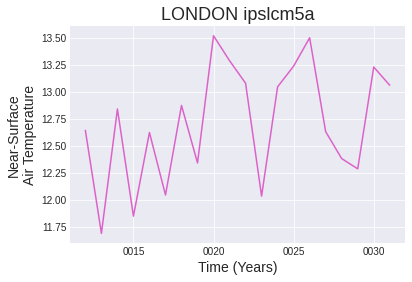

In [199]:
model = 'ipslcm5a'


fig  = plt.figure()
ax = fig.add_subplot(111)


color = constants.MODEL_PARAMS[model.lower()]['color']

(abrupt4x_ds[model]
                 .sel(lat=lat, lon=lon, method='nearest')
                 .isel(time=slice(10, 30))
                 .plot(color=color, ax=ax)
)


ax.set_title(f'{location.name} {model}', size=18)
ax.set_xlabel('Time (Years)', size=14)
ax.set_ylabel(ylabel_name, size=14)
save_name = os.path.join(
    constants.IMAGE_SAVE_DIR_TOP_LEVEL, 
    f'{notebook_number}_{location.name}_{model}_subset_sample_plot.png')
print(save_name)
fig.savefig(save_name, dpi=300, bbox_inches='tight')

/home/563/ab2313/gdata/images/PhD/top_level/06_tas_london_all_window_local_lines.png


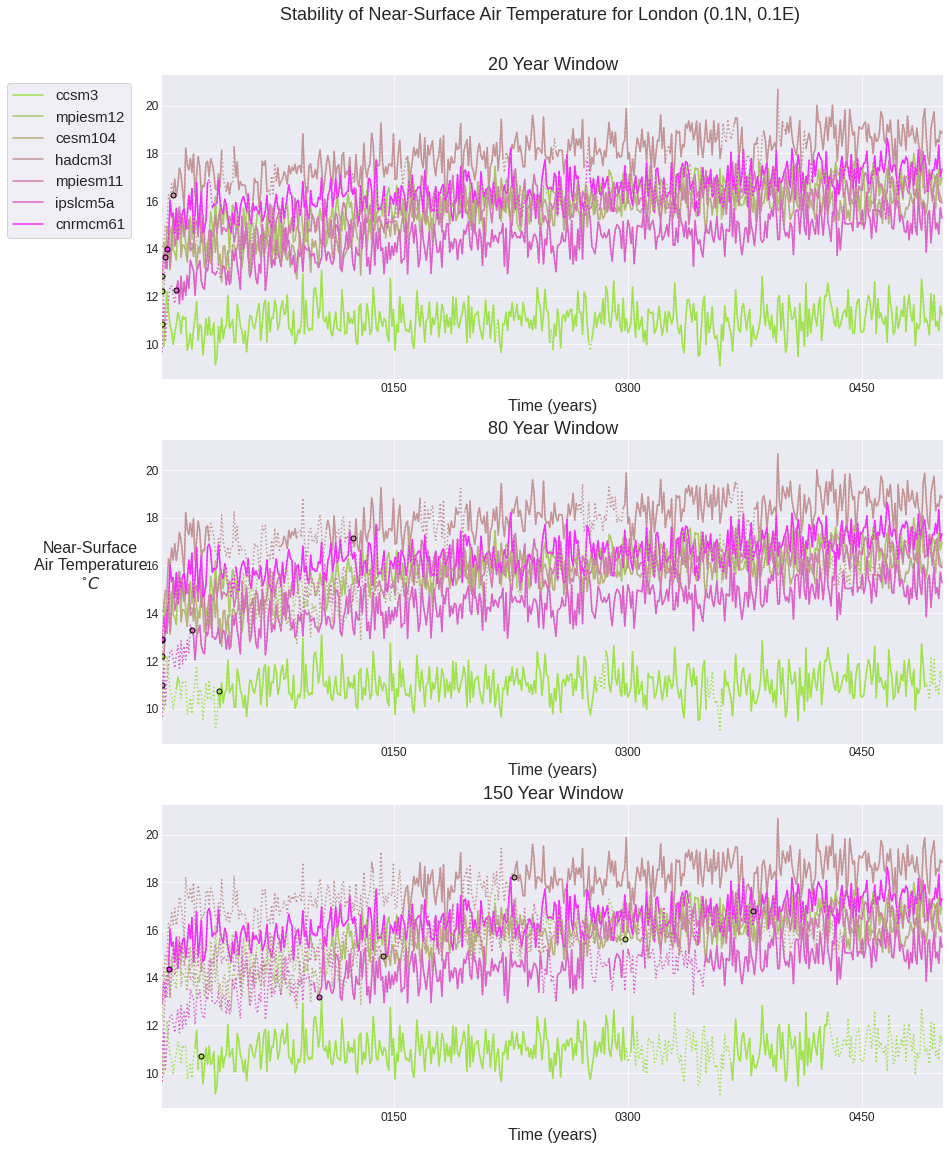

In [172]:
fig = plt.figure(figsize=(14,19))

for plot_num, window, in enumerate(abrupt4x_stable_ds.window.values):
    ax = fig.add_subplot(3,1, plot_num+1)
    legend_on = True if not plot_num else False
    local_point_plot(abrupt4x_ds, abrupt4x_stable_ds, window, location, stable_points, fig, ax
                     , legend_on=legend_on)
    ax.set_title(f'{window} Year Window', fontsize=18)
#     ax.set_xlim(abrupt4x_stable_ds.time.values[0],
#                 abrupt4x_stable_ds.time.values[constants.LONGRUNMIP_EFFECTIVE_LENGTH])
    if plot_num != 1:
        ax.set_ylabel('')
    
fig.suptitle(
    f'Stability of {constants.VARIABLE_INFO[variable]["longname"]} for {get_location_title(location)}',
    fontsize = 18, y=0.93)
save_name = os.path.join(
    constants.IMAGE_SAVE_DIR_TOP_LEVEL, 
f'{notebook_number}_{variable}_{location.name.lower()}_all_window_local_lines.png')
print(save_name)
fig.savefig(save_name, bbox_inches='tight', dpi=300)

/home/563/ab2313/gdata/images/PhD/top_level/06_tas_southern_ocean_20_local_lines.png
/home/563/ab2313/gdata/images/PhD/top_level/06_tas_southern_ocean_80_local_lines.png
/home/563/ab2313/gdata/images/PhD/top_level/06_tas_southern_ocean_150_local_lines.png


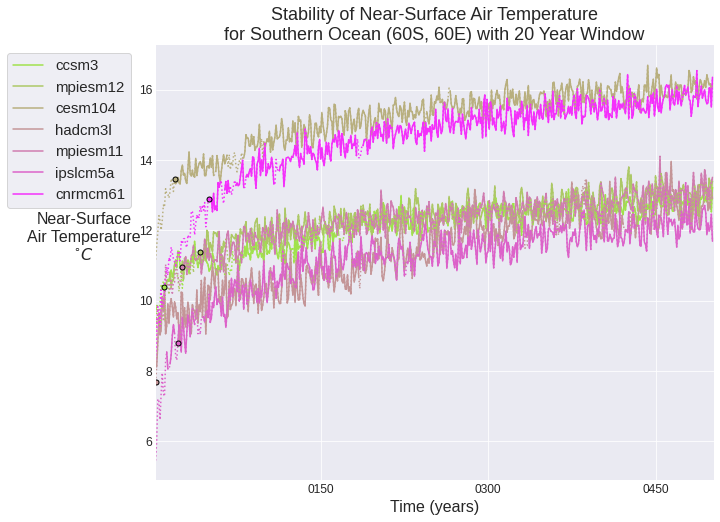

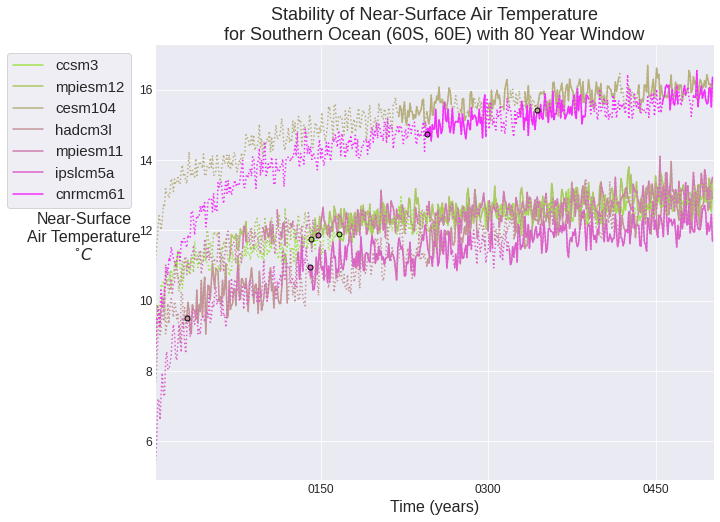

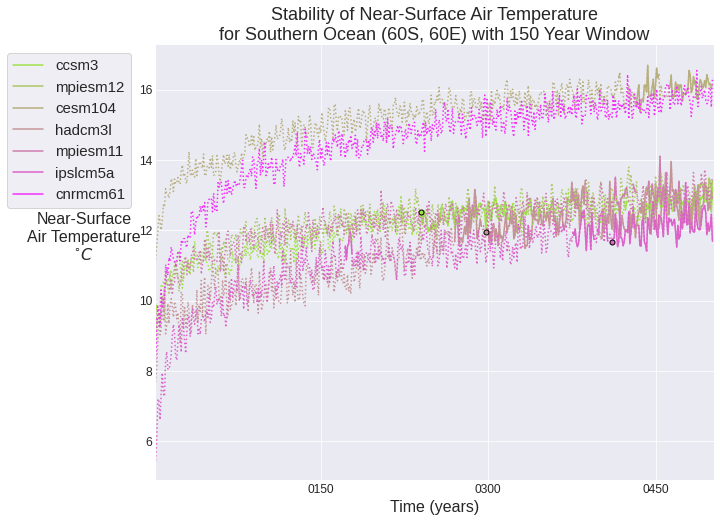

In [38]:
for window in abrupt4x_stable_ds.window.values:
    fig, ax = local_point_plot(abrupt4x_ds, abrupt4x_stable_ds, window, location, stable_points)

    ax.set_title(
    f'Stability of {constants.VARIABLE_INFO[variable]["longname"]}\nfor {get_location_title(location)} with {window} Year Window',
    fontsize = 18)
    save_name = os.path.join(
        constants.IMAGE_SAVE_DIR_TOP_LEVEL,
        f'{notebook_number}_{variable}_{location.name.lower()}_{window}_local_lines.png')
    print(save_name)
    fig.savefig(save_name, bbox_inches='tight', dpi=300)

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'London (0.1N, 0.1E)'}, xlabel='time', ylabel='ipslcm5a'>)

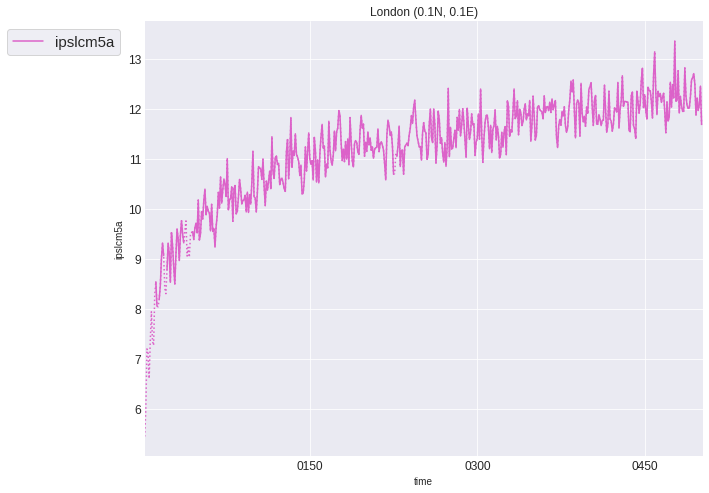

In [39]:
window = 20
model = 'ipslcm5a'
fig, ax = plot_single_point_all_models(
    abrupt4x_stable_ds.sel(window=window)[[model]],location , linestyle='solid')

plot_single_point_all_models(abrupt4x_ds[[model]], location, fig=fig, ax=ax, legend_on=False)

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'London (0.1N, 0.1E)'}, xlabel='time', ylabel='cnrmcm61'>)

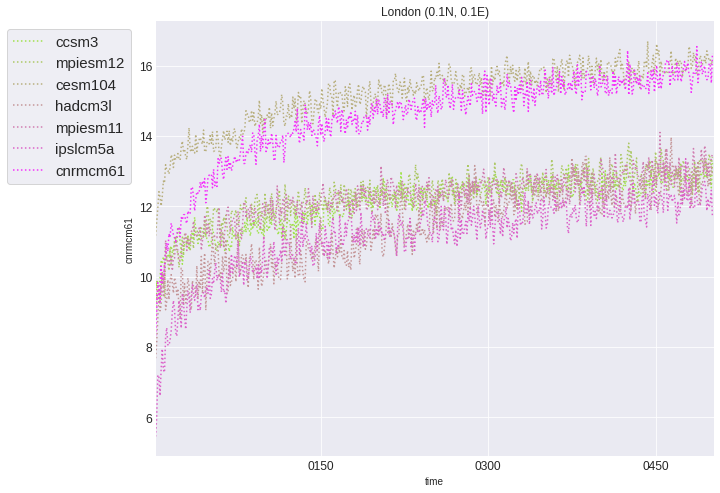

In [40]:
plot_single_point_all_models(abrupt4x_ds, location)

## All Grid Cells

In [41]:
window_max = median_local_stable.median_value.reduce(np.nanpercentile, dim=['lat', 'lon', 'variable'], q=99
                        ).values

window_max = [utils.ceil_to_base(window, base) for window, base in zip(window_max, [10, 100, 100])]

plot_dict_median = {window : {'vmax': vmax, 'levels': np.linspace(0, vmax, 11)} for window, vmax in 
             zip(median_local_stable.window.values, window_max)}
plot_dict_median

{20: {'vmax': 40.0,
  'levels': array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])},
 80: {'vmax': 300.0,
  'levels': array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.])},
 150: {'vmax': 700.0,
  'levels': array([  0.,  70., 140., 210., 280., 350., 420., 490., 560., 630., 700.])}}

/home/563/ab2313/gdata/images/PhD/top_level/06_tas_median_year_of_stabilisation_and_uncertainty.png


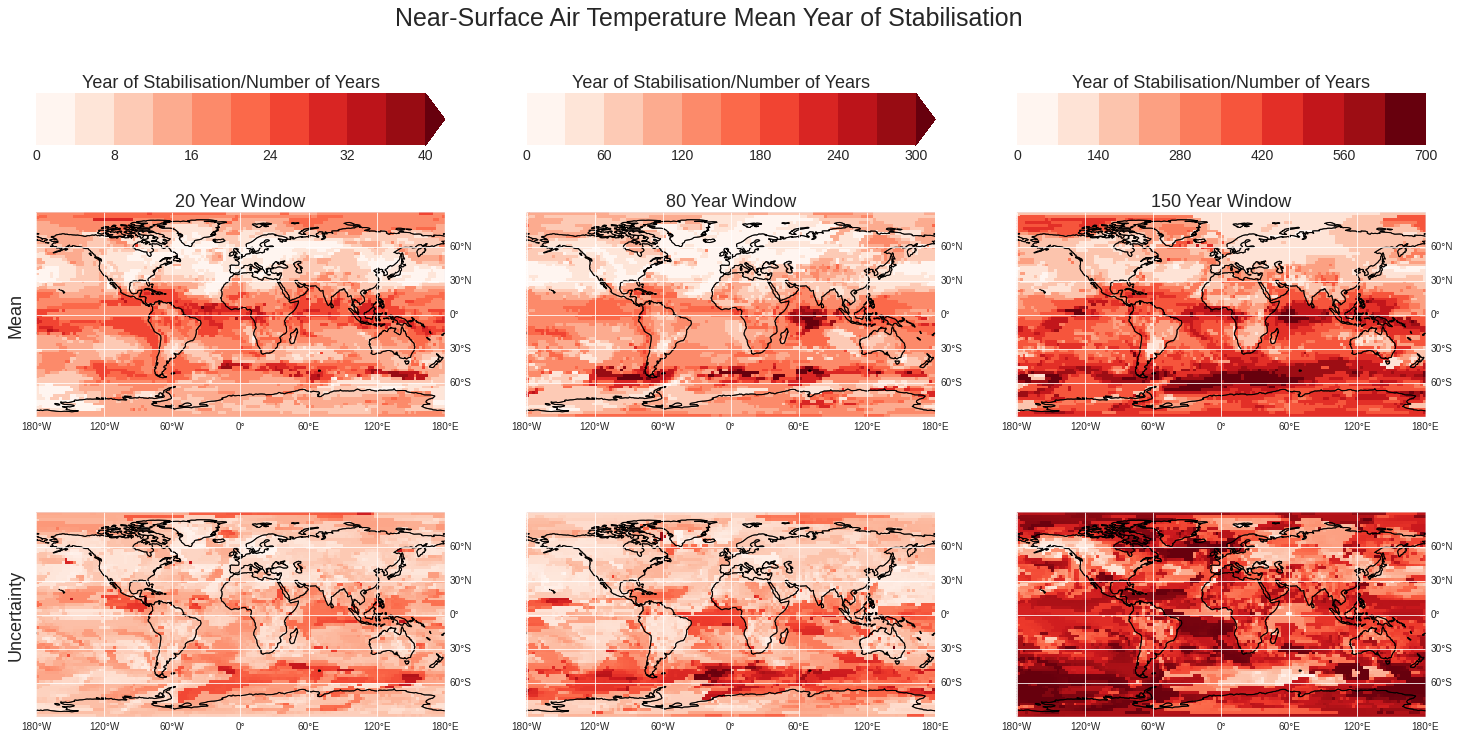

In [42]:
reload(sn_plotting)
fig = sn_plotting.local_stabilisation_average_year_and_uncertainty_plot(
    median_local_stable, plot_dict_median,
    suptitle=f'{constants.VARIABLE_INFO[variable]["longname"]} Mean Year of Stabilisation'
)

save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                         f'{notebook_number}_{variable}_median_year_of_stabilisation_and_uncertainty.png')
print(save_name)
fig.savefig(save_name, dpi = 200, bbox_inches='tight')

In [43]:
dims = list(median_local_diff.dims)
dims = [d for d in dims if d != 'window']
window_max = utils.ceil_to_base(
    median_local_diff.median_value.reduce(np.nanpercentile,q=99, dim=dims).values, 100)
window_min = utils.floor_to_base(
    median_local_diff.median_value.reduce(np.nanpercentile,q=1, dim=dims).values, 100)


window_max = np.max(np.vstack([window_max, np.abs(window_min)]), axis=0)
window_main = -1 * window_max

plot_dict_diff = {window : {'vmax': vmax, 'levels': np.linspace(vmin, vmax, 11)} for window, vmin, vmax in 
             zip(median_local_diff.window.values, window_min, window_max)}
plot_dict_diff

{20: {'vmax': 100.0,
  'levels': array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
           80.,  100.])},
 80: {'vmax': 500.0,
  'levels': array([-500., -400., -300., -200., -100.,    0.,  100.,  200.,  300.,
          400.,  500.])},
 150: {'vmax': 600.0,
  'levels': array([-600., -480., -360., -240., -120.,    0.,  120.,  240.,  360.,
          480.,  600.])}}

/home/563/ab2313/gdata/images/PhD/top_level/06_tas_median_year_of_stabilisation_diff_from_global_and_uncertainty.png


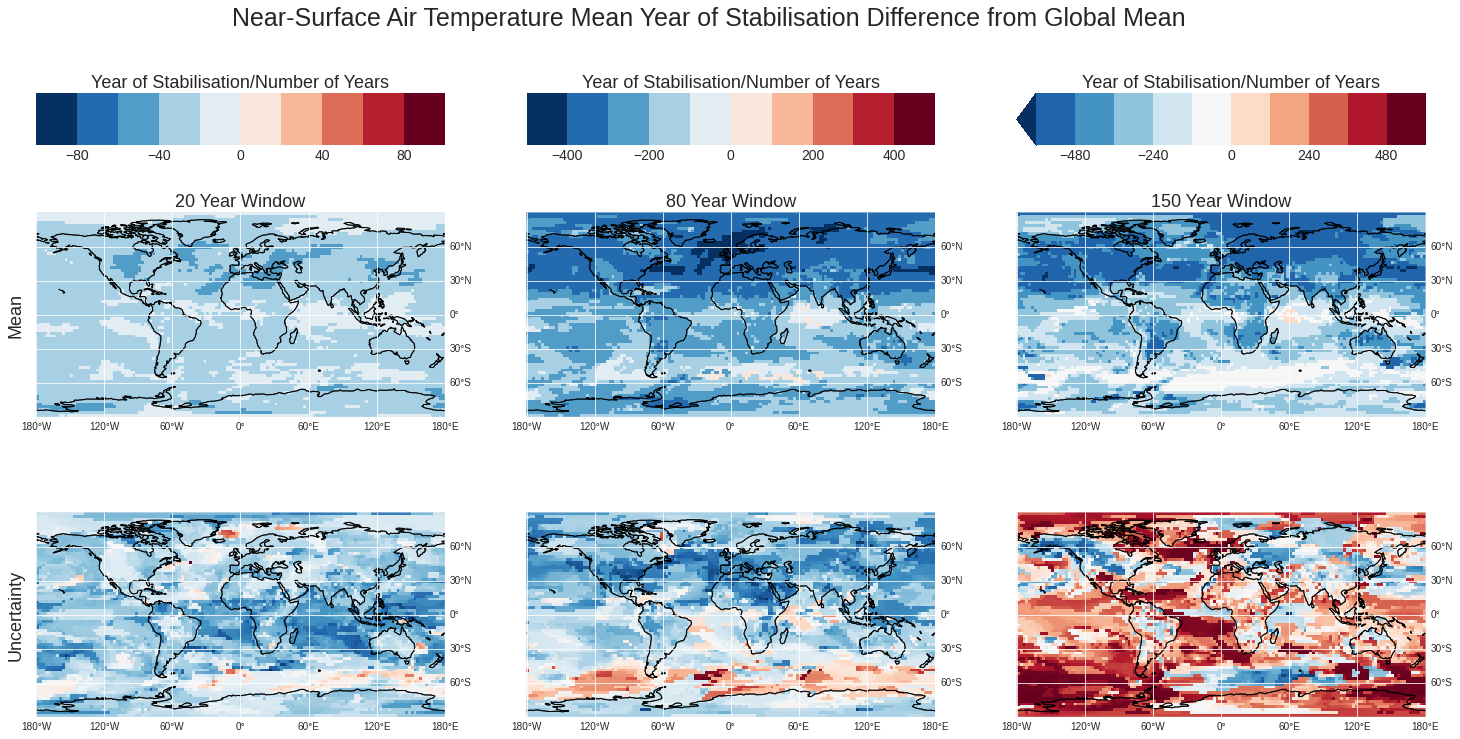

In [44]:
fig = sn_plotting.local_stabilisation_average_year_and_uncertainty_plot(
    median_local_diff, plot_dict_diff, cmap = 'RdBu_r',
suptitle=f'{constants.VARIABLE_INFO[variable]["longname"]} Mean Year of Stabilisation Difference from Global Mean')

save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
        f'{notebook_number}_{variable}_median_year_of_stabilisation_diff_from_global_and_uncertainty.png')
print(save_name)
fig.savefig(save_name, dpi = 200, bbox_inches='tight')

In [45]:
dims = list(first_year_stable_local_ds.dims)
dims = [d for d in dims if d != 'window']
window_max = utils.ceil_to_base(
    first_year_stable_local_ds.reduce(np.nanpercentile,q=99, dim=dims).time.values, 100)
window_min = [0, 0, 0]

plot_dict = {window : {'vmax': vmax, 'levels': np.linspace(vmin, vmax, 11)} for window, vmin, vmax in 
             zip(first_year_stable_local_ds.window.values, window_min, window_max)}

{20: {'vmax': 100.0, 'levels': array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])}, 80: {'vmax': 500.0, 'levels': array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])}, 150: {'vmax': 700.0, 'levels': array([  0.,  70., 140., 210., 280., 350., 420., 490., 560., 630., 700.])}}
/home/563/ab2313/gdata/images/PhD/top_level/06_tas_all_model_year_of_stabilisation.png


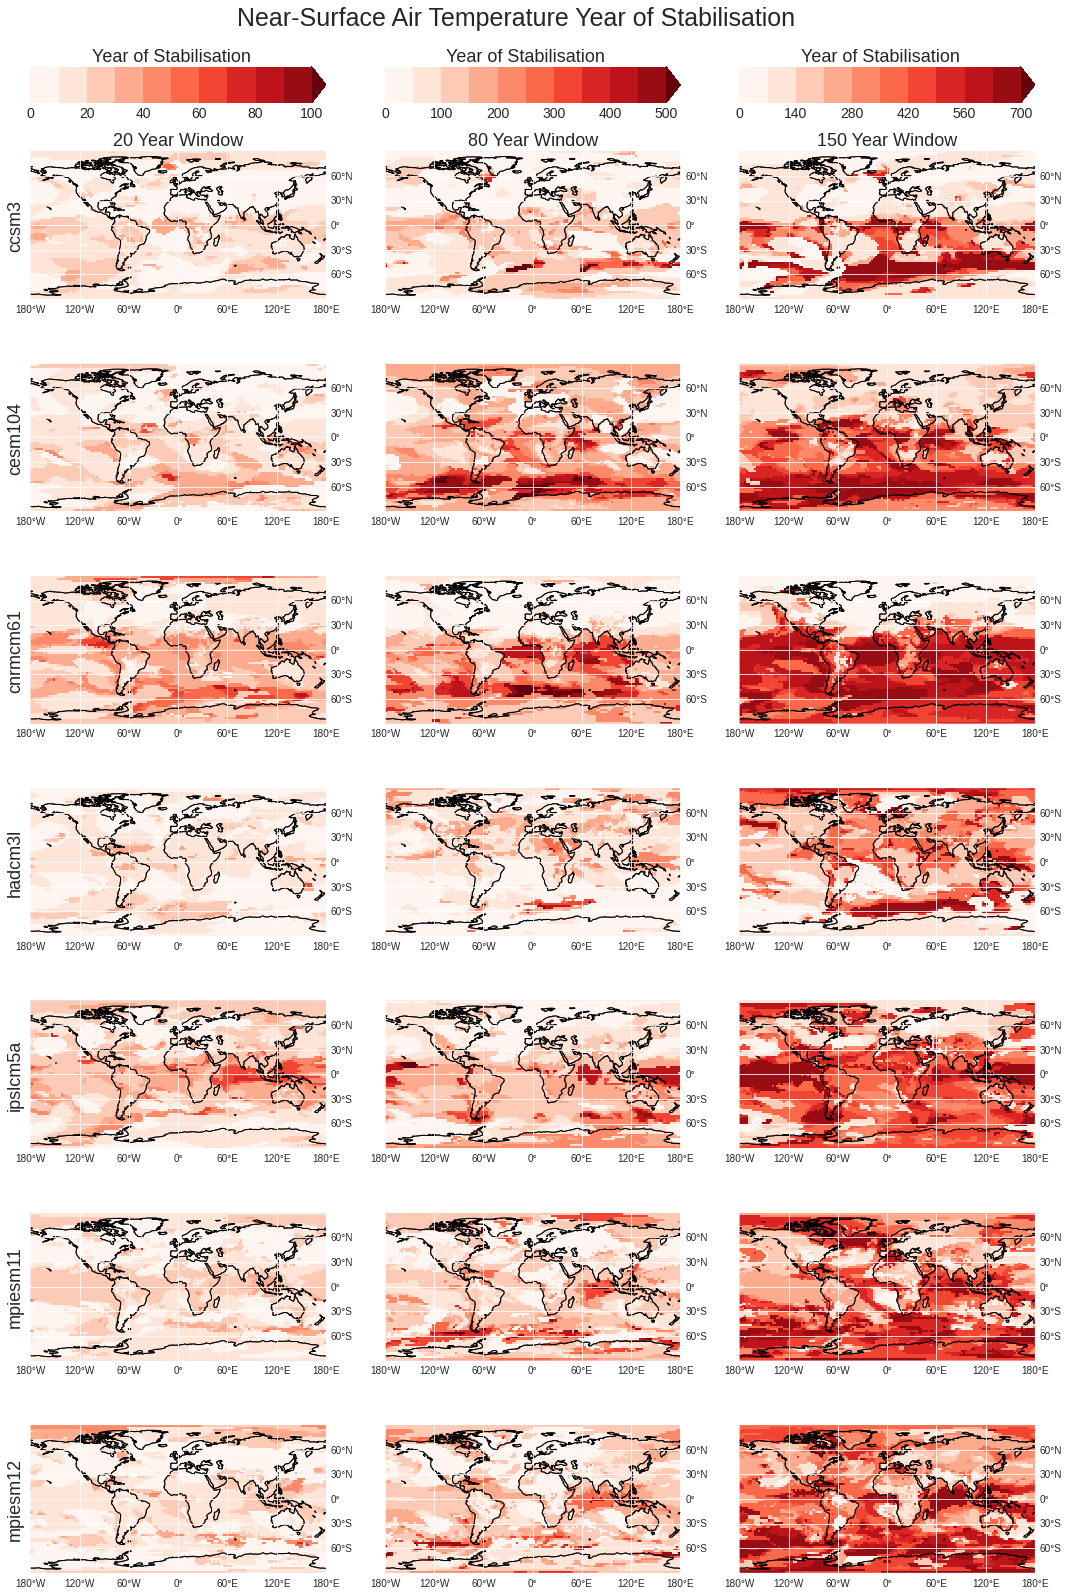

In [46]:
fig, axes, plots = sn_plotting.plot_all_model_multi_window_maps(first_year_stable_local_ds, variable, plot_dict)

save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                         f'{notebook_number}_{variable}_all_model_year_of_stabilisation.png')
print(save_name)
fig.savefig(save_name, dpi = 200, bbox_inches='tight')

In [47]:
dims = list(first_stable_diff_global.dims)
dims = [d for d in dims if d != 'window']
window_max = utils.ceil_to_base(first_stable_diff_global.reduce(np.nanpercentile,q=99, dim=dims).time.values,
                               100)
window_min = utils.floor_to_base(first_stable_diff_global.reduce(np.nanpercentile,q=1, dim=dims).time.values,
                                100)


window_max = np.max(np.vstack([window_max, np.abs(window_min)]), axis=0)
window_main = -1 * window_max

plot_dict = {window : {'vmax': vmax, 'levels': np.linspace(vmin, vmax, 11)} for window, vmin, vmax in 
             zip(first_stable_diff_global.window.values, window_min, window_max)}
plot_dict

{20: {'vmax': 100.0,
  'levels': array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
           80.,  100.])},
 80: {'vmax': 700.0,
  'levels': array([-700., -560., -420., -280., -140.,    0.,  140.,  280.,  420.,
          560.,  700.])},
 150: {'vmax': 700.0,
  'levels': array([-700., -560., -420., -280., -140.,    0.,  140.,  280.,  420.,
          560.,  700.])}}

{20: {'vmax': 100.0, 'levels': array([-100.,  -80.,  -60.,  -40.,  -20.,    0.,   20.,   40.,   60.,
         80.,  100.])}, 80: {'vmax': 700.0, 'levels': array([-700., -560., -420., -280., -140.,    0.,  140.,  280.,  420.,
        560.,  700.])}, 150: {'vmax': 700.0, 'levels': array([-700., -560., -420., -280., -140.,    0.,  140.,  280.,  420.,
        560.,  700.])}}
/home/563/ab2313/gdata/images/PhD/top_level/06_tas_all_model_year_of_stabilisation.png


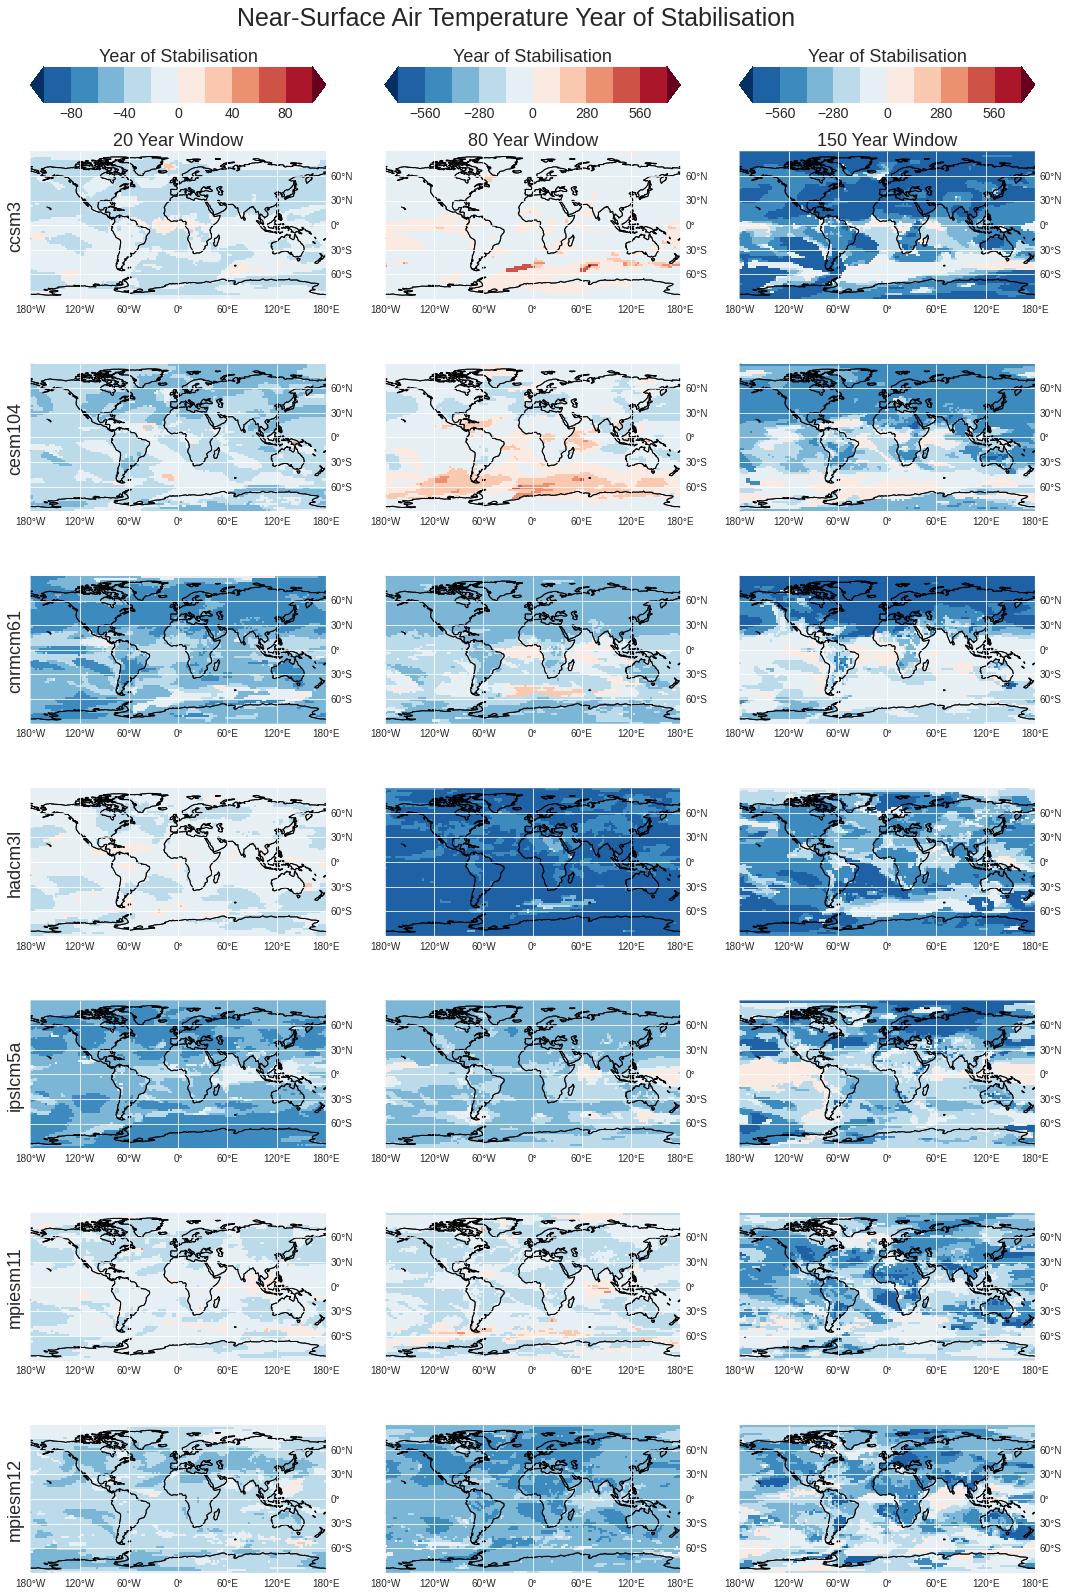

In [48]:
fig, axes, plots = sn_plotting.plot_all_model_multi_window_maps(first_stable_diff_global, variable, plot_dict,
                                                    cmap='RdBu_r', extend='both')

save_name = os.path.join(constants.IMAGE_SAVE_DIR_TOP_LEVEL,
                         f'{notebook_number}_{variable}_all_model_year_of_stabilisation.png')
print(save_name)
fig.savefig(save_name, dpi = 200, bbox_inches='tight')